In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve
import lib
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(666);

LPA-ICI
-------
Set the LPA-ICI parameters

In [3]:
# maximum degree of polynomial used for fitting
N = 4

# parameter for the confidence intervals in the ICI rule
Gamma = 1.5

# Set all the scale values
hmax = 51
all_h = np.arange(1, hmax+1)

Generate the signal

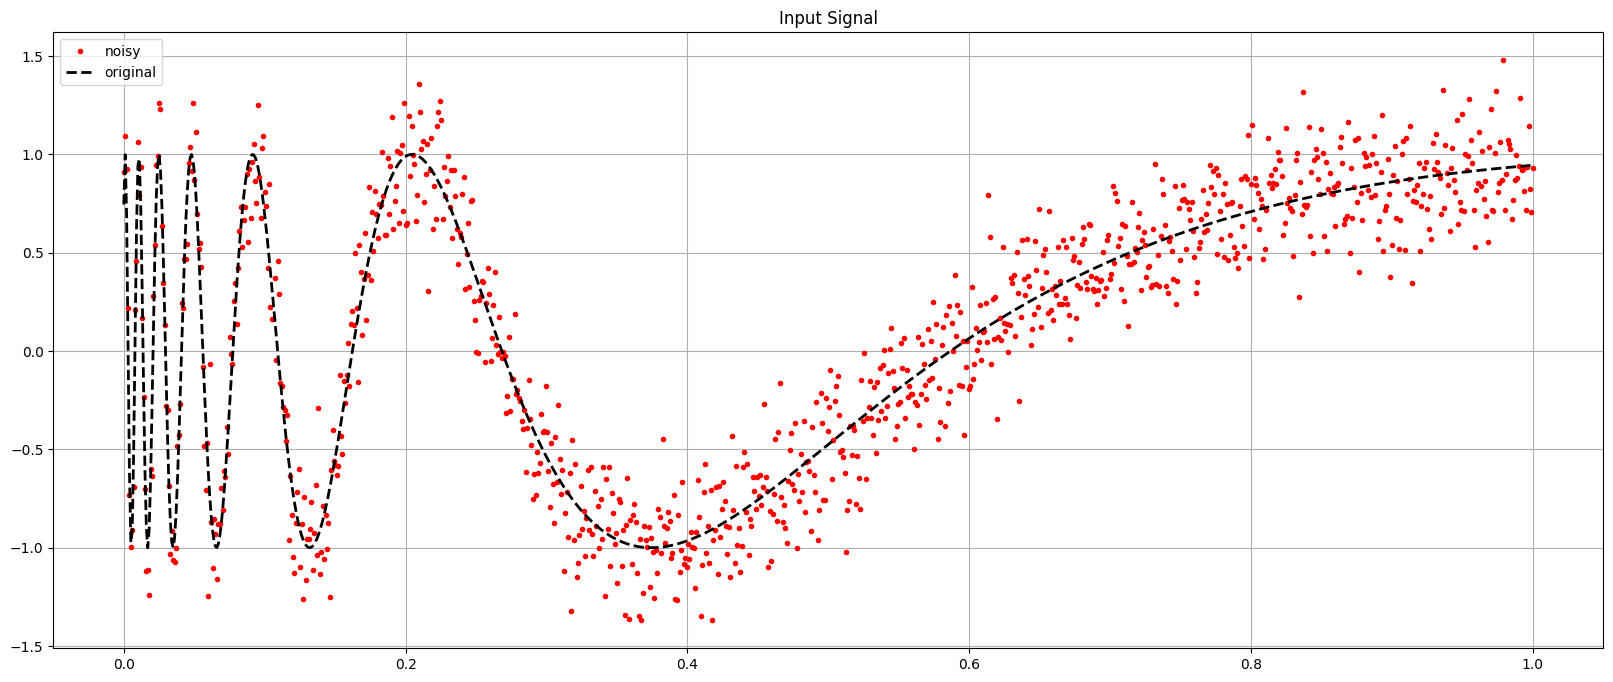

In [4]:
LENGTH = 1000

ty = np.linspace(0, 1, LENGTH)
y = np.sin(2 / (ty + 0.05))

#  noise standard deviation
sigma = 0.2

# noisy signal
s = y + sigma*np.random.normal(size=LENGTH)


plt.figure(figsize=(20, 8))
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=2)
plt.grid()
plt.legend(['noisy', 'original'])
plt.title('Input Signal');

Generate the LPA kernels for all the scale. Use centered weights.


In [5]:
## Using lib 
ici = lib.LPA_ICI(hmax, N, sigma, Gamma)
yhat_final, best_scale = ici.fit(s, 'center')

Use the best scale for each sample to compute the final estimates



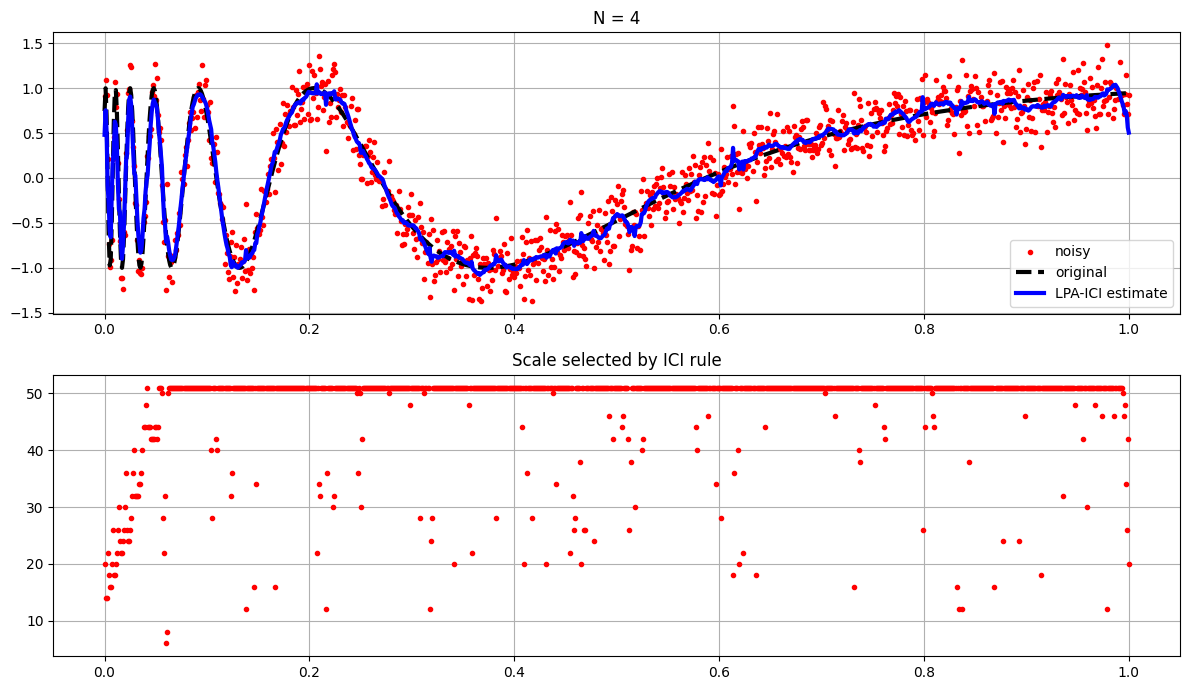

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (12,7))
ax[0].plot(ty, s, 'r.')
ax[0].plot(ty, y, 'k--', linewidth=3)
ax[0].plot(ty, yhat_final, 'm-', linewidth=3, color = 'blue')
ax[0].grid()
ax[0].legend(['noisy', 'original', 'LPA-ICI estimate'])
ax[0].set_title(f'N = {N:d}')

ax[1].plot(ty, best_scale, 'r.')
ax[1].set_title('Scale selected by ICI rule')
ax[1].grid()

fig.tight_layout()
plt.show();

LPA-ICI with Aggregation
------------------------
Set the parameters


In [7]:
# maximum degree of polynomial used for fitting
N = 2

# parameter for the confidence intervals in the ICI rule
Gamma = 2.2

# Set all the scale values
hmax = 51
all_h = np.arange(1, hmax+1)

Generate synthetic signal signal

Text(0.5, 1.0, 'Input Signal')

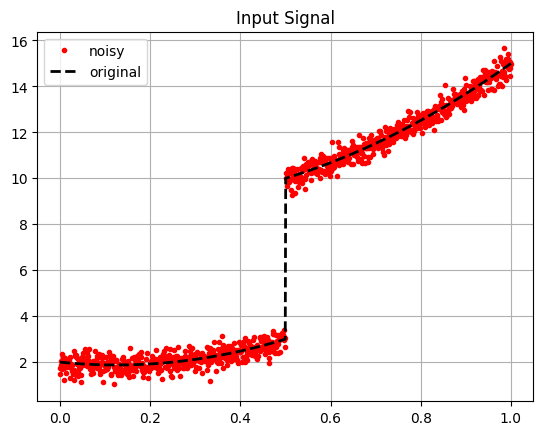

In [8]:
LENGTH = 1000
ty = np.linspace(0, 1, LENGTH)
y = 8 * ty ** 2 - 2*ty + 2
y[ty >0.5] = y[ty >0.5] + 7

#  noise standard deviation
sigma = 0.3

# noisy signal
s = y + sigma*np.random.normal(size=LENGTH)


plt.figure()
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=2)
plt.grid()
plt.legend(['noisy', 'original'])
plt.title('Input Signal')

In [9]:
ici = lib.LPA_ICI(hmax, N, sigma, Gamma)
left_estimate, _ = ici.fit(s, 'left')
right_estimate, _ = ici.fit(s, 'right')

Perform the aggregation


In [10]:
yhat_aggr = (left_estimate + right_estimate) / 2

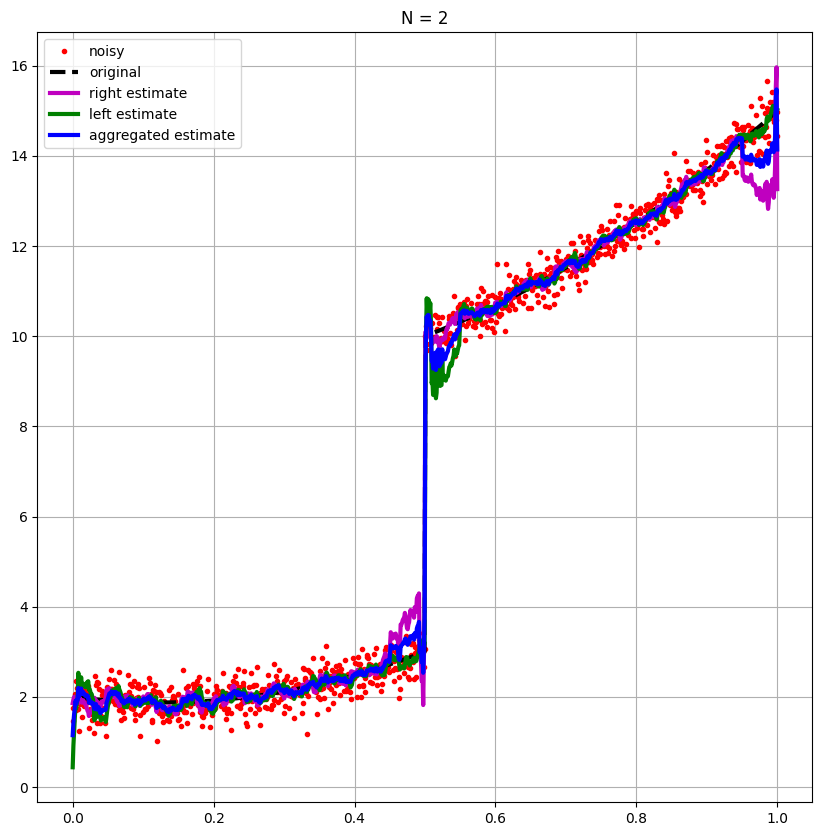

In [11]:
plt.figure(figsize=(10,10))
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=3)
plt.plot(ty, right_estimate, 'm-', linewidth=3)
plt.plot(ty, left_estimate, 'g-', linewidth=3)
plt.plot(ty, yhat_aggr, 'b-', linewidth=3)
plt.grid()
plt.legend(['noisy', 'original', 'right estimate', 'left estimate', 'aggregated estimate'])
plt.title(f'N = {N:d}');